# Importing of libraries

In [ ]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#import tensorflow and DL libs
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

#import RESNET model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

#import Models for data augentation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob

#model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Importing of Data

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True) #connecting google drive

Mounted at /content/gdrive/


In [ ]:
!wget '/content/gdrive/MyDrive/lung_cancer.zip' #extracting all the contents


/content/gdrive/MyDrive/lung_cancer.zip: Scheme missing.


In [ ]:
!unzip '/content/gdrive/MyDrive/lung_cancer.zip' -d '/content/image_class/' #unzip to all files


Streaming output truncated to the last 5000 lines.
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: /content/image_class/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: /conte

In [ ]:
image_set =  "/content/image_class/lung_image_sets"

# Data Augmentation

In [ ]:
SIZE_X = SIZE_Y = 224

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2) #define data augment

#train set
train_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='training',
                                       seed = 42)

#validate set
validate_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X, SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
IMAGE_SIZE = [224, 224] #defining image shape

# Building the model

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #using resnet model

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
# no training of existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
#setting flatten and dense layers
flatten = Flatten()(resnet.output)
dense = Dense(256, activation = 'relu')(flatten)
dense = Dense(128, activation = 'relu')(dense)
prediction = Dense(3, activation = 'softmax')(dense) #using softmax

In [ ]:
#creating a model
model = Model(inputs = resnet.input, outputs = prediction )

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# compiling the model
#using adam optimizer and cateogrical crossentropy

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
##fittingt the model with epochs
history = model.fit_generator(train_set, validation_data = (validate_set), epochs = 5, verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
94/94 [==============================] - 130s 1s/step - loss: 9.1150 - accuracy: 0.8225 - val_loss: 0.3245 - val_accuracy: 0.9533
Epoch 2/5
94/94 [==============================] - 115s 1s/step - loss: 0.2864 - accuracy: 0.9583 - val_loss: 0.1576 - val_accuracy: 0.9633
Epoch 3/5
94/94 [==============================] - 114s 1s/step - loss: 0.1642 - accuracy: 0.9687 - val_loss: 0.0993 - val_accuracy: 0.9757
Epoch 4/5
94/94 [==============================] - 115s 1s/step - loss: 0.0144 - accuracy: 0.9938 - val_loss: 0.0598 - val_accuracy: 0.9857
Epoch 5/5
94/94 [==============================] - 116s 1s/step - loss: 0.0042 - accuracy: 0.9983 - val_loss: 0.0480 - val_accuracy: 0.9880


# Evaluation of models

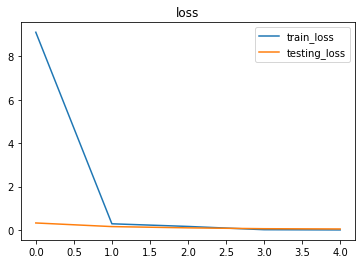

In [ ]:
# plotting the lossof the models
plt.plot(history.history['loss'],label = 'train_loss') #train loss
plt.plot(history.history['val_loss'], label = 'testing_loss') #validation loss
plt.title('loss')
plt.legend()
plt.show()

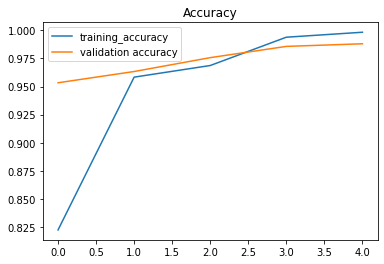

In [ ]:
# plotting accuracy of the models
plt.plot(history.history['accuracy'], label='training_accuracy') #test accuracy 
plt.plot(history.history['val_accuracy'], label='validation accuracy') #validation accuracy
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
#confusion matrix
Y_pred = model.predict_generator(validate_set)
y_pred = np.argmax(Y_pred ,axis =1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
target_names = ['aca','n', 'scc'] #setting target names

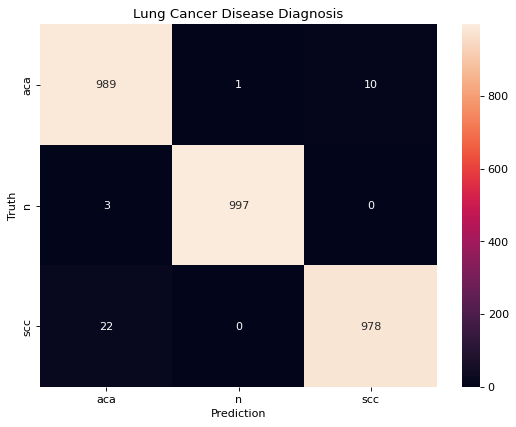

In [ ]:
#defining confusion matrix
import seaborn as sns
conf_arr = confusion_matrix(validate_set.classes, y_pred) #confusion martrix of actual and predicted labels

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

#visualizing the confusion matrix
ax = sns.heatmap(conf_arr, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names) #plot for confusion matrix

plt.title('Lung Cancer Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [ ]:
#classification report
print(classification_report(validate_set.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         aca       0.98      0.99      0.98      1000
           n       1.00      1.00      1.00      1000
         scc       0.99      0.98      0.98      1000

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
#evaluate on test data.
result = model.evaluate(validate_set,batch_size=128)
print("test_loss, test accuracy",result)

24/24 [==============================] - 23s 936ms/step - loss: 0.0480 - accuracy: 0.9880
test_loss, test accuracy [0.04796789214015007, 0.9879999756813049]
